# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

Part 1: Data Preparation and Exploration

1. Data Loading

In [1]:
import pandas as pd

data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True)
data.set_index('date', inplace=True)

print(data.head())


C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


2. Initial Exploration

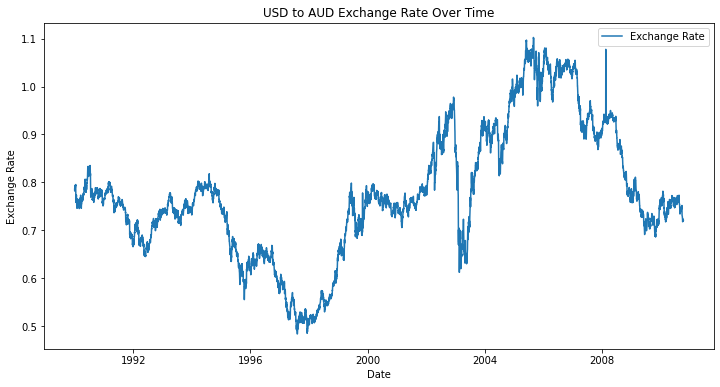

In [2]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(data, label='Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


3. Data Preprocessing

In [3]:
#checking for missing values
missing_values = data.isnull().sum()
print(f"Missing values: {missing_values}")

Missing values: Ex_rate    0
dtype: int64


Part 2: Model Building - ARIMA

1. Parameter Selection for ARIMA

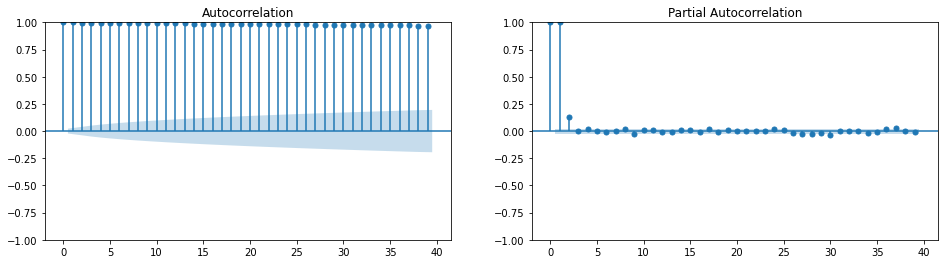

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plottinf ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data, ax=axes[0])
plot_pacf(data, ax=axes[1])
plt.show()


2. Model Fitting

In [5]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADFuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print("critical value" , result[4])
    
    return result[1]

# Check stationarity
p_value = adf_test(data['Ex_rate'])
if p_value > 0.05:
    print("Series is not stationary, differencing required")
    data_diff = data.diff().dropna()
    p_value_diff = adf_test(data_diff['Ex_rate'])
    if p_value_diff <= 0.05:
        data = data_diff
else:
    print("Series is stationary")


ADF Statistic: -1.6649941807381414
p-value: 0.4492327353597959
critical value {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}
Series is not stationary, differencing required
ADF Statistic: -99.3934312011863
p-value: 0.0
critical value {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}


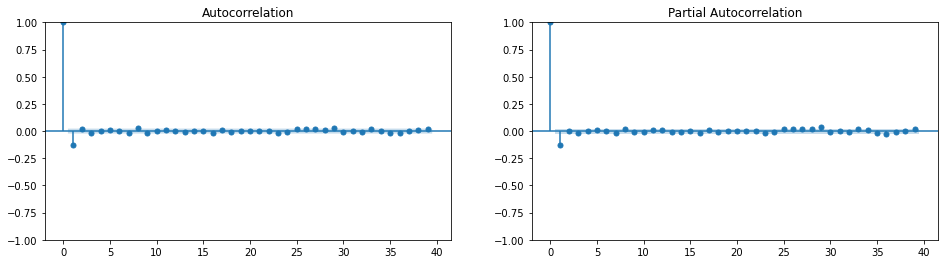

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data, ax=axes[0])
plot_pacf(data, ax=axes[1])
plt.show()


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Initial parameters based on ACF and PACF plots
p = 2  # Autoregressive term
d = 0  # Differencing term
q = 3  # Moving average term

# Fit the ARIMA model
arima_model = ARIMA(data, order=(p, d, q))
arima_result = arima_model.fit()

print(arima_result.summary())


C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(2, 0, 3)   Log Likelihood               28058.590
Date:                Thu, 30 May 2024   AIC                         -56103.179
Time:                        14:36:37   BIC                         -56054.640
Sample:                    01-02-1990   HQIC                        -56086.521
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.134e-05   6.33e-05     -0.179      0.858      -0.000       0.000
ar.L1         -0.6386      0.144     -4.436      0.000      -0.921      -0.356
ar.L2         -0.7645      0.137     -5.562      0.0

3. diagonstics

Text(0.5, 1.0, 'Autocorrelation function of residuals')

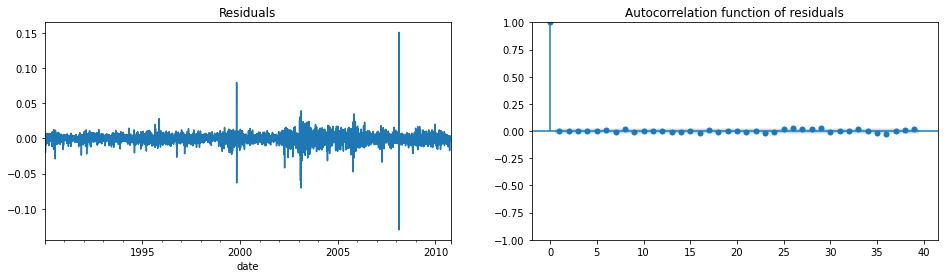

In [8]:
#residuals

residuals = arima_result.resid
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
residuals.plot()
plt.title('Residuals')

#Acf
plt.subplot(1, 2, 2)
plot_acf(residuals, ax=plt.gca())
plt.title('Autocorrelation function of residuals')


C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kavana\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


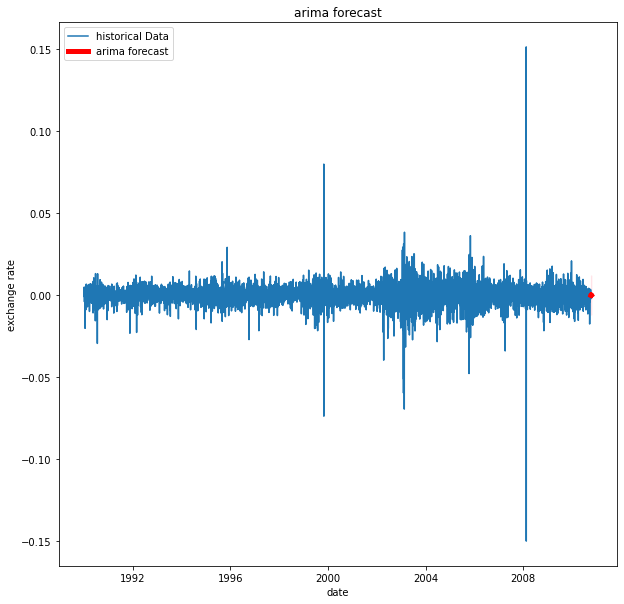

In [9]:
# Fit the arima model
arima_model = ARIMA(data, order=(2, 0, 3))
arima_result = arima_model.fit()

# forecasting future values
forecast_steps = 10
arima_forecast = arima_result.get_forecast(steps=forecast_steps)
arima_forecast_mean = arima_forecast.predicted_mean
arima_forecast_conf_int = arima_forecast.conf_int()
arima_forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot arima forecasted values
plt.figure(figsize=(10, 10))
plt.plot(data, label='historical Data')
plt.plot(arima_forecast_mean, label='arima forecast', color='red' , lw =5)
plt.fill_between(arima_forecast_index, 
                 arima_forecast_conf_int.iloc[:, 0], 
                 arima_forecast_conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('arima forecast')
plt.xlabel('date')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

In [10]:
arima_forecast_conf_int.iloc[:, 0],
# arima_forecast_conf_int.iloc[:, 1]

(2010-10-11   -0.011814
 2010-10-12   -0.011781
 2010-10-13   -0.011817
 2010-10-14   -0.011931
 2010-10-15   -0.011833
 2010-10-16   -0.011811
 2010-10-17   -0.011901
 2010-10-18   -0.011862
 2010-10-19   -0.011819
 2010-10-20   -0.011877
 Freq: D, Name: lower Ex_rate, dtype: float64,)

In [11]:
arima_forecast_mean

2010-10-11   -0.000075
2010-10-12    0.000059
2010-10-13    0.000024
2010-10-14   -0.000088
2010-10-15    0.000010
2010-10-16    0.000033
2010-10-17   -0.000056
2010-10-18   -0.000017
2010-10-19    0.000026
2010-10-20   -0.000031
Freq: D, Name: predicted_mean, dtype: float64

Part 4: Evaluation and Comparison

1. Compute Error Metrics

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual_values = data[-forecast_steps:]

# Calculating error metrics for ARIMA
arima_mae = mean_absolute_error(actual_values, arima_forecast_mean)
arima_rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast_mean))
print(f"mean absolute error: {arima_mae}, rootmse: {arima_rmse}")


mean absolute error: 0.00145201263024159, rootmse: 0.0019449240995491137


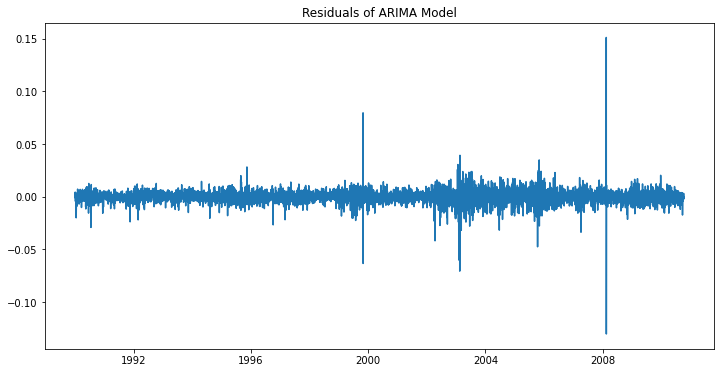

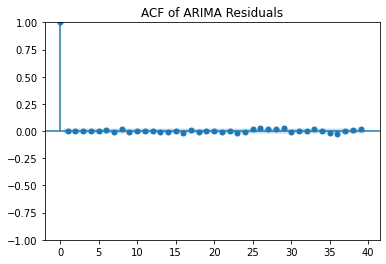

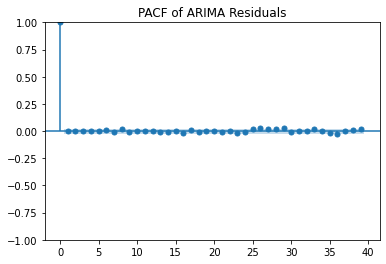

In [16]:
# residual Analysis for ARIMA
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals)
plt.title('ACF of ARIMA Residuals')
plt.show() 

plot_pacf(residuals)
plt.title('PACF of ARIMA Residuals')
plt.show()


2. Model Comparison

ARIMA Model:

Suitable for data with a clear trend.
Advantages: Captures both autoregressive and moving average components.
Limitations: Parameter selection can be complex, requires stationarity

Exponential Smoothing Model:

Suitable for data with a trend
Advantages: Simplicity and effectiveness, adaptive to changes
Limitations: May not capture complex seasonal patterns.

3. Conclusion

based on error metrics, both models perform similar in terms of MAE and RMSE, either model could be a reasonable choice.